# Les 3 - Heun

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Forward Euler met de hand

Hieronder staat de code om de forward-euler met de hand opdracht te controleren en visualiseren.

In [ ]:
def forward_euler(h):
    num_steps = int(2/h)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    t = np.zeros(num_steps + 1)

    t[0]=0
    x[0]=0
    v[0]=0
    a = 6

    for i in range(num_steps):
        t[i+1] = t[i] + h
        x[i+1] = x[i] + h*v[i]
        v[i+1] = v[i] + h*a

    return t, x, v
        
t1, x1, v1 = forward_euler(1)         
    
t0_5, x0_5, v0_5 = forward_euler(0.5) 

t0_1, x0_1, v0_1 = forward_euler(0.1)

In [ ]:
pd.DataFrame({'t':t1, 'x':x1, 'v':v1})

In [ ]:
plt.plot(t1, x1, color = 'red', label = 'h=1')
plt.plot(t0_5, x0_5, color = 'orange', label = 'h=0.5')
plt.plot(t0_1, x0_1, color = 'green', label = 'h=0.1')
t = np.linspace(0,2,50)
plt.plot(t,1/2*6*t**2, color = 'b', label = 'echte waarde')

plt.xlabel('tijd in seconde (t)')
plt.ylabel('afgelegde afstand in meters (x)')
plt.legend(loc="upper left")

In [ ]:
plt.plot(t1, v1, color = 'red', label = 'h=1')
plt.plot(t0_5, v0_5, color = 'orange', label = 'h=2')
plt.plot(t0_1, v0_1, color = 'green', label = 'h=0.1')
t = np.linspace(0,2,50)
plt.plot(t,6*t, color = 'b', label = 'echte waarde')

plt.xlabel('tijd in seconde (t)')
plt.ylabel('snelheid in meter per seconde (v)')
plt.legend(loc="upper left")

## Heun bij een tweede orde differentiaalvergelijking

Voor een tweede orde differentiaalvergelijking, waarbij de versnelling constant is, geldt:
    $$\frac{dx}{dt} = v(t)$$
    $$\frac{dv}{dt} = a$$
met 
$$ x(0) = c_1$$
$$ v(0) = c_2$$

Gegeven stapgrootte $h$, benader bij iedere stap eerst met forward euler de snelheid op tijdstip $t +h$, oftewel $$v(t+h) = v(t) + h \cdot a.$$ Benader dan $x(t + h)$ met:
$$ x(t+h) = x(t) + (v(t) + v(t+h))/2)$$

In [ ]:
#Heun
def heun(h):
    num_steps = int(2/h)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    t = np.zeros(num_steps + 1)

    t[0]=0
    x[0]=0
    v[0]=0
    a = 6

    for i in range(num_steps):
        #bereken v_E met forward Euler
        v_E = v[i] + h*a

        
        t[i+1] = t[i] + h
        x[i+1] = x[i] + h*(v[i] +v_E)/2
        v[i+1] = v[i] + h*a

    return t, x, v

In [ ]:
t1, x1, v1 = heun(1)

In [ ]:
plt.plot(t1, x1, color = 'red', label = 'Heun met h=1')

t = np.linspace(0,2,50)
plt.plot(t,1/2*6*t**2, color = 'b', label = 'echte waarde')

plt.xlabel('tijd in seconde (t)')
plt.ylabel('snelheid in meter per seconde (v)')
plt.legend(loc="upper left")

## Heun bij een eerste orde differentiaalvergelijking
<p style="color:red"> Hier hadden we in de les geen tijd voor, kijk zelf of je dit snapt. </p>
Gegeven is de differentiaalvergelijking 
$$\frac{dy}{dt} = 1 + 0.5\cdot y(t) \mathrm{\ \ \ met\ \ \     } y(0) = 0.$$

Bereken $y(3)$


In [ ]:
def heun(step_size, total_time):
    h = step_size
    num_steps = int(total_time/h)

    y = np.zeros(num_steps + 1)
    t = np.zeros(num_steps + 1)

    for i in range(num_steps):
        t[i+1] = t[i] + h

        #forward euler
        y_E = y[i] + h * (1 + 0.5 *y[i])

        #heun
        y[i+1] = y[i] + h * ((1 + 0.5 * y[i]) + (1 + 0.5 * y_E))/2

    return t, y

In [ ]:
def forward_euler(step_size, total_time):
    h = step_size
    num_steps = int(total_time/h)

    y = np.zeros(num_steps + 1)
    t = np.zeros(num_steps + 1)

    for step in range(num_steps):
        t[step+1] = t[step] + h
        y[step+1] = y[step] + h * (y[step] * 0.5 + 1)

    return t, y

In [ ]:
th, yh = heun(0.5, 3)
te, ye = forward_euler(0.5, 3)
plt.plot(th, yh, color = 'g')
plt.plot(te, ye, color = 'r')

## Formule voor heun's methode bij eerste orde differentiaalvergelijking

Heun:
Stel je hebt een differentiaalvergelijking $$\frac{dy}{dt} = f(t,y)$$

Bij iedere stap met stapgrootte h, bereken je: 
$$y_E = y(t) + h \cdot f(y,t)$$

$$y(t+h) = y(t) + h \cdot (f(t, y) + f(t+h, y_E))$$

## Heun bij de mieren

Je hebt een mierenplaag in je huis en je vraagt je af of je er ooit nog vanaf gaat komen. Hiervoor ga je een berekening doen en je gaat uit van de volgende aannames:
- De kolonie bestaat momenteel uit 3000 mieren.
- Iedere maand legt de konining 1000 eitjes - deze komen allemaal uit.
- Het lukt je om iedere maand de helft van de mieren te doden.
  
Hoeveel mieren zijn er na een jaar?
 

### Uitwerking
Stel de differentiaalvergelijking (*differential equation*) op
$$\frac{dA(t)}{dt} = 1000 - 0.5 \cdot A(t)$$
$$A(0) = 3000$$
Dus met heun bereken je bij iedere stap:
$$A_E = A(t) + h \cdot (1000 - 0.5 \cdot A(t))$$
$$A(t+h) = A(t) + h \cdot \frac{(1000 - 0.5 \cdot A_E) + (1000 - 0.5 \cdot A(t))}{2}$$


In [ ]:
#jullie zelf in code!

def heun_mieren(stepsize, total_time):
    h = stepsize
    num_steps = int(total_time / h)
    A = np.zeros(num_steps + 1)
    t = np.zeros(num_steps + 1)
    A[0] = 3000
    t[0] = 0

    for i in range(num_steps):
        t[i+1] = t[i] + h
    
        A_E = A[i] + h * (1000-0.5 * A[i]) #forward euler
        A[i+1] = A[i] + h* (1000 - 0.5 * A[i] + 1000 - 0.5 * A_E)/2
        #merk op, je berekent nu 2 keer 1000 - 0.5 A[i]. 
        #Dit kun je voor de snelheid beter in een variabele opslaan.

    return t, A

In [ ]:
t, A = heun_mieren(0.1, 12)

De formule voor het aantal mieren op tijdstip t kun je ook door middel van integreren vinden (valt buiten de lesstof). Die is gegeven door:
$$ A(t) = 1000 \cdot e^{-0.5t} + 2000$$
We plotten hieronder de gevonden waarden met Heun en de echte grafiek:

In [ ]:
plt.plot(t, A, color = 'blue')
plt.plot(t, 1000*np.exp(-0.5*t) + 2000, color = 'red')

## Opdracht Veerbeweging

<p style="color:red"> Vanaf hier zijn we er in de les niet meer aan toegekomen, deze bespreken we in de volgende les. Je kunt de uitwerkingen vast bekijken, maar probeer het eerst zelf. </p>

In [4]:
import numpy
import matplotlib.pyplot as plt
k = 1 # veerconstante
m = 2 # massa van de bal
def forward_euler_veer(step_size, seconds):
    h=step_size
    num_steps = int(seconds/step_size)
    t = numpy.zeros(num_steps+1)
    x = numpy.zeros(num_steps+1)
    v = numpy.zeros(num_steps+1)
    t[0] = 0
    x[0] = 1
    v[0] = 0
    
    for step in range(num_steps):
        t[step + 1] = t[step] + h
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * - (k/m * x[step])
    return(t,x,v)

Text(0.5, 0, 'Time in s')

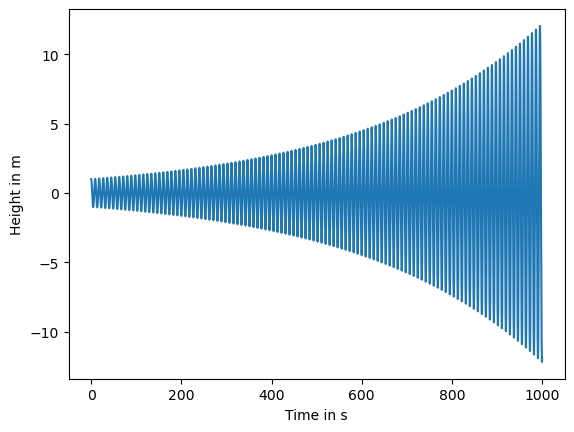

In [6]:

t, x, v = forward_euler_veer(0.01, 1000)

plt.plot(t, x)
plt.ylabel('Height in m')
plt.xlabel('Time in s')


In [7]:
import numpy
import matplotlib.pyplot as plt
k = 1 # veerconstante
m = 2 # massa van de bal

def acceleration(x):
    return -k/m*xs

def heun_veer(step_size, seconds):
    h=step_size
    num_steps = int(seconds/step_size)
    t = numpy.zeros(num_steps+1)
    x = numpy.zeros(num_steps+1)
    v = numpy.zeros(num_steps+1)
    t[0] = 0
    x[0] = 1
    v[0] = 0
    
    for step in range(num_steps):
        #forward euler
        v_E = v[step] + h * (-k/m * x[step])
        x_E = x[step] + h * v[step]

        #heun
        t[step + 1] = t[step] + h
        x[step + 1] = x[step] + h * (v[step] + v_E)/2
        v[step + 1] = v[step] + h * (- k/m * x[step] - k/m*x_E)/2
    return(t,x,v)

In [ ]:
#Hier berekenen we de echte waarde:
timestep = 0.01
seconds = 100
t,x_e,v_e = forward_euler_veer(timestep, seconds)
x = np.cos(t/np.sqrt(2))

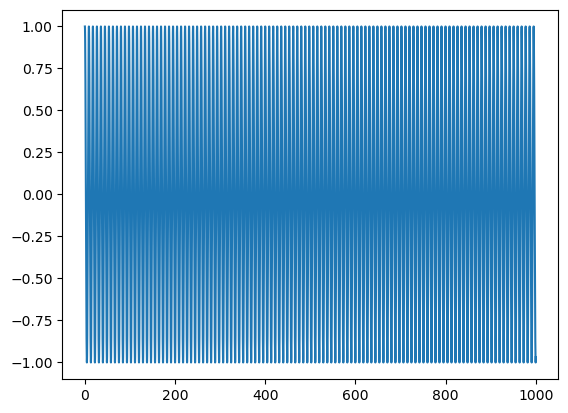

In [21]:
#plot heun
t, x_h, v_h = heun_veer(0.01,1000)
#t, x_e, v_e = forward_euler_veer(0.01, 1000)
x_real = np.cos(t/np.sqrt(2))

plt.plot(t, x_h, label = 'heun')
#plt.plot(t, x_real, label = 'real values')
#plt.plot(t, x_e, label = 'euler')
#plt.plot(t, x_real - x_e, label = 'error')
#plt.legend(loc = 'upper left')




In [ ]:
#Met heun
import numpy
import matplotlib.pyplot
k = 1 # veerconstante
m = 2 # massa van de bal
def heun(step_size, seconds):
    h=step_size
    num_steps = int(seconds/step_size)
    t = numpy.zeros(num_steps+1)
    x = numpy.zeros(num_steps+1)
    v = numpy.zeros(num_steps+1)
    t[0] = 0
    x[0] = 1
    v[0] = 0

    
    for step in range(num_steps):
        v_E = v[step] + h * - (k/m * x[step])
        x_E = x[step] + h * v[step]
        
        t[step + 1] = t[step] + h
        x[step + 1] = x[step] + h * (v[step] + v_E)/2
        v[step + 1] = v[step] + h * (- k/m * x[step] + -k/m * x_E)/2
    return(t,x,v)


In [ ]:
t_h,x_h,v_h = heun(timestep,seconds )

In [ ]:
#plot heun erbij

plt.plot(t, x_e, label = 'forward euler')
plt.plot(t, x, label = 'real values')
plt.plot(t, x_h, label = 'heun')
plt.plot(t, x_e - x, label = 'error fe')
plt.plot(t, x_h - x, label = 'error heun')
plt.legend(loc = 'upper left')


## Opdracht Heun voor de orbit

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

total_time = 24 * 3600 # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time ** 2 / 4 / math.pi ** 2) ** (1/3) # m
speed = 2.0 * math.pi * radius / total_time # m / s

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth) ** 3 * vector_to_earth


def heuns_method(num_steps):
    ### Old Euler Method
    h = total_time / num_steps
    x = np.zeros([num_steps + 1, 2]) # two-dimensional array to store results
    v = np.zeros([num_steps + 1, 2])

    x[0, 0] = radius # three o'clock position
    v[0, 1] = speed # only upwards motion at start

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * acceleration(x[step])

    error = np.linalg.norm(x[-1] - x[0]) # difference between end position and start position
    plt.scatter(h, error, color = 'r', label = 'error forward euler')
    # End Euler Method

    ### Heun's Method
    for step in range(num_steps):
        initial_acceleration = acceleration(x[step])
        x_E = x[step] + h * v[step]
        v_E = v[step] + h*acceleration(x[step])
        a_E = acceleration(x_E)

        x[step + 1] = x[step] + h * (v[step] + v_E)/2
        v[step + 1] = v[step] + h * (initial_acceleration + a_E)/2

    error = np.linalg.norm(x[-1] - x[0])
    plt.scatter(h, error, c = 'g', label = 'error heun')
    # End Heun's Method


for num_steps in [200, 500, 1000, 2000, 5000, 10000]:
    error = heuns_method(num_steps)

plt.xlim(xmin = 0.)
plt.ylim(ymin = 0.)
axes = plt.gca()
axes.set_xlabel('Step size in s')
axes.set_ylabel('Error in m')
plt.show()

## Opdracht het getal e

In [ ]:
# forward euler
def forward_euler_e(stepsize, total_time):
    h = stepsize
    num_steps = int(total_time/stepsize)

    t = np.zeros(num_steps + 1)
    u = np.zeros(num_steps + 1)
    u[0] = 1

    for i in range(num_steps):
        t[i + 1] = t[i] + h
        u[i + 1] = u[i] + h * u[i]

    return t, u

In [ ]:
for n in [5,10,20,100]:
    t, u_e = forward_euler_e(1/n, 1)
    print('De benadering van e met {} stappen forward euler is: {} \n Dit ligt {} af van de echte waarde'.format(n, u_e[-1],np.exp(1) - u_e[-1]))

In [ ]:
# forward euler
def heun_e(stepsize, total_time):
    h = stepsize
    num_steps = int(total_time/stepsize)

    t = np.zeros(num_steps + 1)
    u = np.zeros(num_steps + 1)
    u[0] = 1

    for i in range(num_steps):
        u_E = u[i] + h * u[i]
        
        t[i + 1] = t[i] + h
        u[i + 1] = u[i] + h * (u[i] + u_E)/2

    return t, u

In [ ]:
n = int(input('Geef het aantal stappen:'))

t, u_h = heun_e(1/n, 1)
t, u_e = forward_euler_e(1/n, 1)
print('De benadering van e met {} stappen forward euler is: {} \n Dit ligt {} af van de echte waarde'.format(n, u_e[-1],np.exp(1) - u_e[-1]))
print('De benadering van e met {} stappen heun is: {} \n Dit ligt {} af van de echte waarde'.format(n, u_h[-1],np.exp(1) - u_h[-1]))

plt.plot(t, u_e, color = 'r', label = 'forward euler')
plt.plot(t, u_h, color = 'orange', label = 'heun')
plt.plot(t, np.exp(t), color = 'g', label = 'e^t')
plt.xlabel('t')
plt.legend(loc = 'upper left')

In [ ]:
plt.plot(t, u_e, color = 'r', label = 'forward euler')
plt.plot(t, u_h, color = 'orange', label = 'heun')
plt.plot(t, np.exp(t), color = 'g', label = 'e^t')
plt.xlabel('t')
plt.legend(loc = 'upper left')

In [ ]:
num_steps = [5,10,20,40,50,60,100,1000]
error_euler = np.zeros(len(num_steps))
error_heun = np.zeros(len(num_steps))

for i in range(len(num_steps)):
    t, u_e = forward_euler_e(1/num_steps[i], 1)
    t, u_h = heun_e(1/num_steps[i], 1)
    error_euler[i] = np.exp(1) - u_e[-1] 
    error_heun[i] = np.exp(1) - u_h[-1] 

In [ ]:
plt.scatter(num_steps, error_euler, color = 'r')
plt.scatter(num_steps, error_heun, color = 'g')